내가 해야 할 것들  
1. 시각화 정착
2. 3번 테스트 이전까지 완벽하게 구성 완료하기
3. train에 사진 300장 추가, test3에 사진 추가해서 정확도 70%까지 높혀보기

# 주제: 가위바위보 분류하기

## 데이터
train data: 직접 찍은 가위, 바위, 보 사진 각각 365장 총 1095장  
test data: 다른 사람들의 가위, 바위, 보 사진 각각 100장 총 300장, 3번 시도  

## 목표
1. 여러가지 평가지표 시각화하기 (train acc / train loss / val acc / val loss )
2. 오버피팅을 극복하기 위해 다양한 데이터셋 사용, 정규화, 모델구성 변화 등 시도하기
3. 정확도 60% 넘기기!!

### (1) 라이브러리 불러오기

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### (2) 데이터 전처리
모든 이미지를 28x28 사이즈로 바꾸고 픽셀값을 0~1 사이의 값으로 정규화한다

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

365  images to be resized.
365  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

365  images to be resized.
365  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

365  images to be resized.
365  images resized.
보 이미지 resize 완료!


In [6]:
import numpy as np

def load_data(img_path, number_of_data=1095):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1095 입니다.
x_train shape: (1095, 28, 28, 3)
y_train shape: (1095,)


라벨:  1


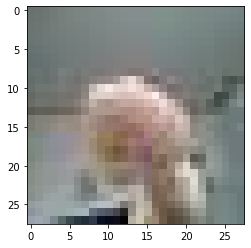

In [10]:
import matplotlib.pyplot as plt

index = 566
plt.imshow(x_train[index])
print('라벨: ', y_train[index])

### (3) 모델 구성하기

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=11

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### (4) 모델 컴파일 및 학습하기 

In [12]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 3s 5ms/step - loss: 1.0609 - accuracy: 0.4840
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 0.8724 - accuracy: 0.6648
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7580
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.8174
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8822
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.9151
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9452
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9598
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9671
Epoch 10/10
35/35 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9635


### (5) 테스트용 데이터 불러오기

In [13]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
#테스트용 사진 resize

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

#바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

#보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### (6) 평가하기

In [14]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 445.1967 - accuracy: 0.3200
test_loss: 445.19671630859375 
test_accuracy: 0.3199999928474426


In [15]:
# 학습 결과 시각화


### (7) 더 좋은 결과를 위한 시도들
#### 1. 모델 구성을 바꾸기

In [18]:
n_channel_1=32
n_channel_2=64
n_dense=256
n_train_epoch=11

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)         

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 1s 9ms/step - loss: 1.0981 - accuracy: 0.3717
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: 0.8581 - accuracy: 0.5991
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.8201
Epoch 4/10
35/35 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8849
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.1646 - accuracy: 0.9388
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0919 - accuracy: 0.9753
Epoch 7/10
35/35 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9534
Epoch 8/10
35/35 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9845
Epoch 9/10
35/35 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9936
Epoch 10/10
35/35 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9781


In [20]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 32.3456 - accuracy: 0.6233
test_loss: 32.345577239990234 
test_accuracy: 0.6233333349227905


-> 당황스럽게도 첫번째 시도에서 정확도 62%가 나왔다!! 일단 목표는 성공했는데 다른 사진들로도 테스트도 해보고 정확도를 더 높혀봐야겠다.

#### 2. 다른 데이터로도 평가해보기

In [21]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)

#바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/rock"
resize_images(image_dir_path)

#보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [22]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 261.9996 - accuracy: 0.5167
test_loss: 261.99957275390625 
test_accuracy: 0.5166666507720947


-> 다른 사람의 파일로 하니 51%로 정확도가 떨어졌다. 모델 구성을 다시 바꿔보아야겠다.

In [60]:
n_channel_1=64
n_channel_2=32
n_channel_3=32
n_dense=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 32)        

In [61]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 1s 10ms/step - loss: 1.1041 - accuracy: 0.3242
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 1.0990 - accuracy: 0.3443
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 1.0971 - accuracy: 0.3543
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9732 - accuracy: 0.4886
Epoch 5/10
35/35 [==============================] - 0s 6ms/step - loss: 0.7646 - accuracy: 0.6073
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.6566
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.6913
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4909 - accuracy: 0.7772
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.8155
Epoch 10/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4034 - accuracy: 0.8356


In [62]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 103.2350 - accuracy: 0.5833
test_loss: 103.2349853515625 
test_accuracy: 0.5833333134651184


-> epoch를 높혔을 때는 오히려 과적합되어 모델 평가할 때는 더 정확도가 떨어져서 10으로 고정하였다. layer을 추가할 때 오류가 나서 두번째 layer뭉터기에 padding = 'same'을 추가하니 더 정확도가 높게 나왔다. 모델 구성을 더 깊게 만들면서 차원이 맞지 않을 땐 padding='same'을 추가해야겠다.

In [114]:
n_channel_1=64
n_channel_2=32
n_channel_3=32
n_dense=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 26, 26, 64)        1792      
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 6, 6, 32)        

In [115]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=40)

Epoch 1/40
35/35 [==============================] - 1s 6ms/step - loss: 1.1002 - accuracy: 0.3397
Epoch 2/40
35/35 [==============================] - 0s 6ms/step - loss: 1.1010 - accuracy: 0.3178
Epoch 3/40
35/35 [==============================] - 0s 6ms/step - loss: 1.0930 - accuracy: 0.3909
Epoch 4/40
35/35 [==============================] - 0s 6ms/step - loss: 1.0136 - accuracy: 0.4594
Epoch 5/40
35/35 [==============================] - 0s 5ms/step - loss: 0.7904 - accuracy: 0.5900
Epoch 6/40
35/35 [==============================] - 0s 5ms/step - loss: 0.6329 - accuracy: 0.7068
Epoch 7/40
35/35 [==============================] - 0s 5ms/step - loss: 0.5327 - accuracy: 0.7790
Epoch 8/40
35/35 [==============================] - 0s 5ms/step - loss: 0.4335 - accuracy: 0.8402
Epoch 9/40
35/35 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9169
Epoch 10/40
35/35 [==============================] - 0s 6ms/step - loss: 0.1489 - accuracy: 0.9489
Epoch 11/40
35/35 [

In [116]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 732.6441 - accuracy: 0.6533
test_loss: 732.6441040039062 
test_accuracy: 0.653333306312561


-> 제일 높은 점수를 보인 모델 구성에서 에폭 수를 높히니 정확도가 65까지 나왔다!

In [120]:
n_channel_1=64
n_channel_2=32
n_channel_3=32
n_dense=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 26, 26, 64)        1792      
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 6, 6, 32)        

In [121]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=50)

Epoch 1/50
35/35 [==============================] - 1s 6ms/step - loss: 1.1011 - accuracy: 0.3242
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 1.0988 - accuracy: 0.3352
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 1.0941 - accuracy: 0.3699
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.9328 - accuracy: 0.5260
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.7440 - accuracy: 0.5826
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.6119
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5833 - accuracy: 0.7014
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5291 - accuracy: 0.7516
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.8219
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.8402
Epoch 11/50
35/35 [

In [122]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 614.3344 - accuracy: 0.6167
test_loss: 614.3344116210938 
test_accuracy: 0.6166666746139526


-> 무조건 에폭 수가 많아진다고 정확도가 높아지지는 않는다, 정확한 지점을 잘 봐야한다.

In [ ]:
# 시각화 참고하기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### 3. 과적합을 막기 위해 train데이터의 양을 더욱 다양하게 하기
:다른 사람의 사진 데이터 300장을 train data에 추가하고 다시 다른 test data로 시도한다.

# 프로젝트 회고

## 배운점
1. ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_61/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_61/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [3,3,32,32]. 오류가 떴다. shape을 맞춰주기 위해 padding = 'same'을 추가하여 해결했다.  

## 부족한점

## 종합의견



# Reference
1. 케라스 sequential model 참고  
https://keras.io/ko/getting-started/sequential-model-guide/    
2. 평가지표   
https://tykimos.github.io/2017/07/09/Training_Monitoring/  
3. 과적합 극복하는 방법  
https://wikidocs.net/61374  